# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | kolonia
Processing Record 3 of Set 1 | kerikeri
Processing Record 4 of Set 1 | el granada
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | geraldton
Processing Record 7 of Set 1 | mildura
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | ash shafa
City not found. Skipping...
Processing Record 10 of Set 1 | hamilton
Processing Record 11 of Set 1 | leo
Processing Record 12 of Set 1 | port mathurin
Processing Record 13 of Set 1 | holualoa
Processing Record 14 of Set 1 | shaowu
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | wailua homesteads
Processing Record 17 of Set 1 | jiazi
Processing Record 18 of Set 1 | yinchuan
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | papatowai
Processing Record 21 of Set 1 | iskateley
Processing Record 22 of Set 1 | i

In [5]:
city_weather

{'coord': {'lon': 120.7167, 'lat': 40.6167},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': -6.62,
  'feels_like': -13.62,
  'temp_min': -6.62,
  'temp_max': -6.62,
  'pressure': 1034,
  'humidity': 36,
  'sea_level': 1034,
  'grnd_level': 1032},
 'visibility': 10000,
 'wind': {'speed': 7.71, 'deg': 15, 'gust': 9.19},
 'clouds': {'all': 100},
 'dt': 1705721964,
 'sys': {'country': 'CN', 'sunrise': 1705706207, 'sunset': 1705741112},
 'timezone': 28800,
 'id': 2033766,
 'name': 'Xingcheng',
 'cod': 200}

In [6]:
city_url

'http://api.openweathermap.org/data/2.5/weather?appid=8e5b214ff46a218c23d1ed8ba6387921&q=xingcheng&units=metric'

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,10.37,75,88,8.99,CL,1705721593
1,kolonia,50.9333,6.9500,-2.13,86,0,2.57,DE,1705721593
2,kerikeri,-35.2268,173.9474,26.62,72,43,2.24,NZ,1705721594
3,el granada,37.5027,-122.4694,14.39,91,100,4.12,US,1705721594
4,adamstown,-25.0660,-130.1015,24.05,84,27,6.95,PN,1705721595


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,10.37,75,88,8.99,CL,1705721593
1,kolonia,50.9333,6.9500,-2.13,86,0,2.57,DE,1705721593
2,kerikeri,-35.2268,173.9474,26.62,72,43,2.24,NZ,1705721594
3,el granada,37.5027,-122.4694,14.39,91,100,4.12,US,1705721594
4,adamstown,-25.0660,-130.1015,24.05,84,27,6.95,PN,1705721595


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

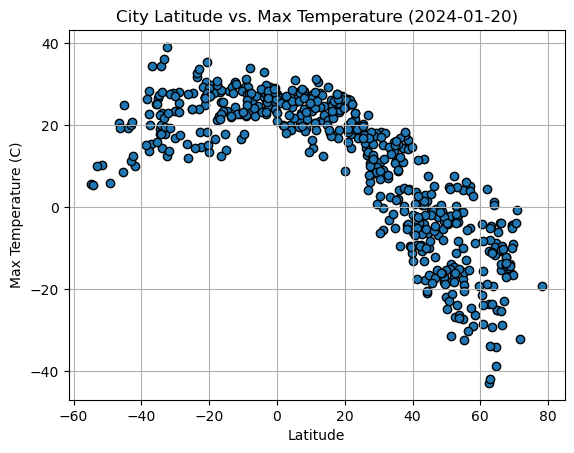

In [27]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2024-01-20)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

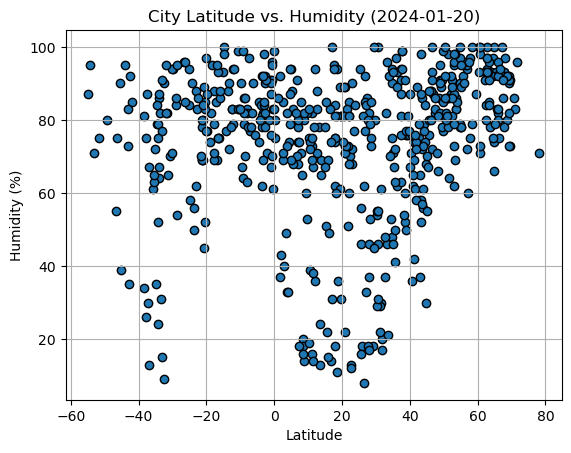

In [28]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-01-20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

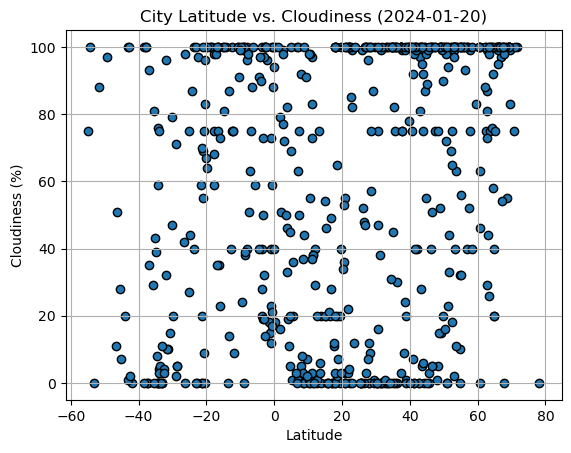

In [29]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-01-20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

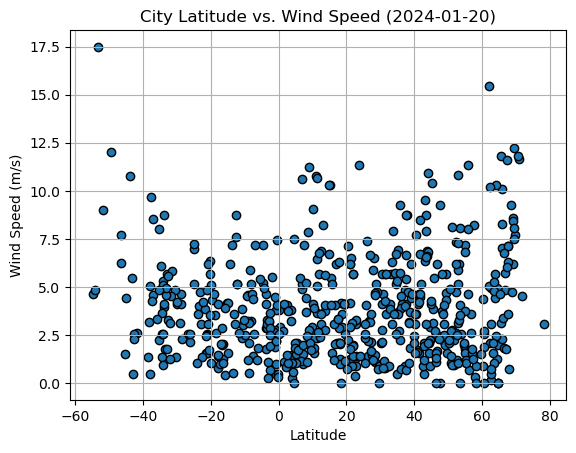

In [30]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-01-20)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,FormattedDate
City_ID,,,,,,,,,,
1,kolonia,50.9333,6.9500,-2.13,86,0,2.57,DE,1705721593,2024-01-20
3,el granada,37.5027,-122.4694,14.39,91,100,4.12,US,1705721594,2024-01-20
8,hamilton,39.1834,-84.5333,-9.31,76,100,6.17,US,1705721396,2024-01-20
9,leo,11.1000,-2.1000,20.61,16,3,2.62,BF,1705721599,2024-01-20
11,holualoa,19.6228,-155.9522,24.32,81,40,2.57,US,1705721600,2024-01-20


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,FormattedDate
City_ID,,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,10.37,75,88,8.99,CL,1705721593,2024-01-20
2,kerikeri,-35.2268,173.9474,26.62,72,43,2.24,NZ,1705721594,2024-01-20
4,adamstown,-25.0660,-130.1015,24.05,84,27,6.95,PN,1705721595,2024-01-20
5,geraldton,-28.7667,114.6000,28.23,54,5,4.63,AU,1705721347,2024-01-20
6,mildura,-34.2000,142.1500,34.48,24,59,5.28,AU,1705721382,2024-01-20


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8625030753606359


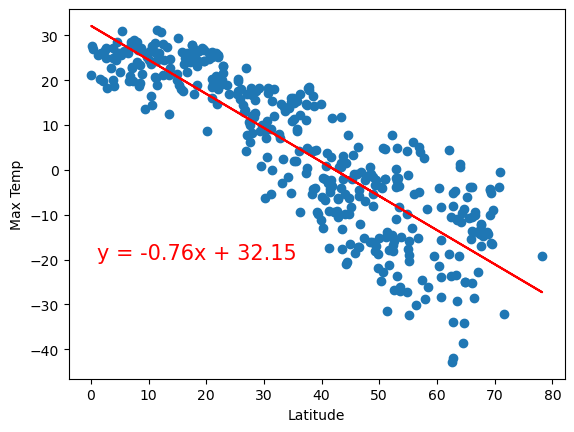

In [47]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Max Temp"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,-20),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r square value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

The r-value is: 0.47625858146267874


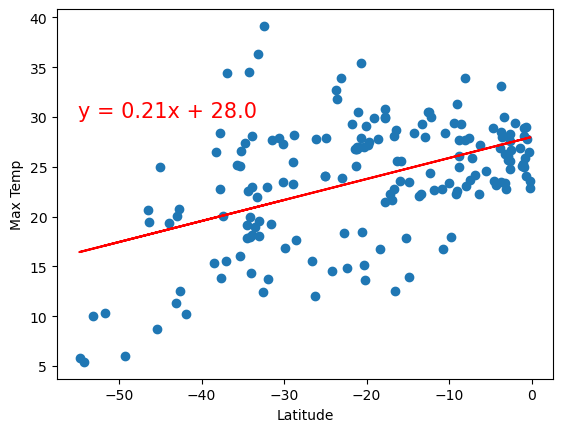

In [56]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Max Temp"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r square value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
For Northern Hemisphere, there is a negative linear relationship between Latitude and Max Temperature. This is because the r value is less than 1. 

For Southern Hemisphere, there is a positive linear relationship between Latitude and Max Temperature. This is because the r value is greater than 1. 

The extent of the relationship depends on the r value. The closer the r value to 1, the stronger the positive relationship. The closer the r value to -1, the stronger the negative relationship. When r value is close to 0, which means the relationship is weak. 


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4166369444070185


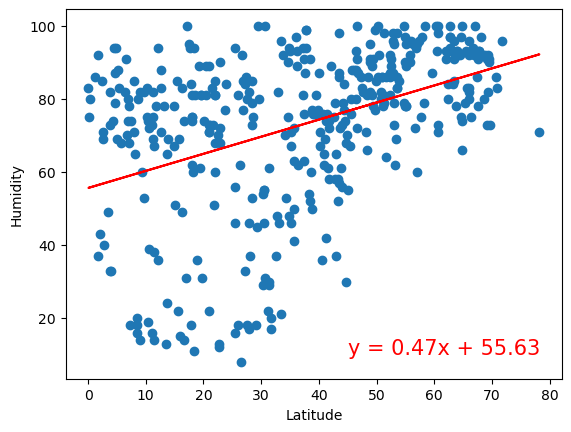

In [57]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Humidity"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

The r-value is: 0.3149652675958913


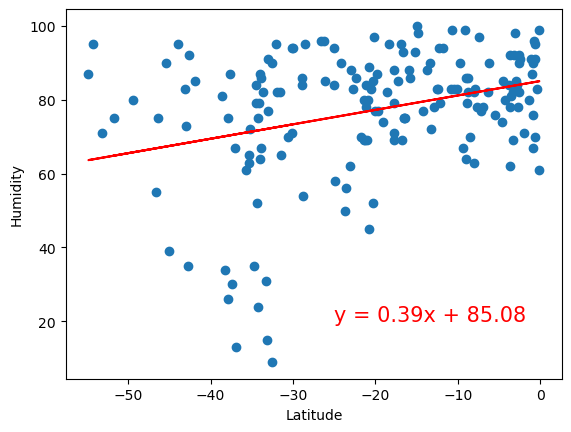

In [62]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Humidity"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
For both Northern Hemisphere and Southern Hemisphere, there is a positive linear relationship between Latitude and Humidity. This is because the r value is greater than 1. 

The extent of the relationship depends on the r value. The closer the r value to 1, the stronger the positive relationship. When r value is close to 0, which means the relationship is weak. 


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.3579862301415845


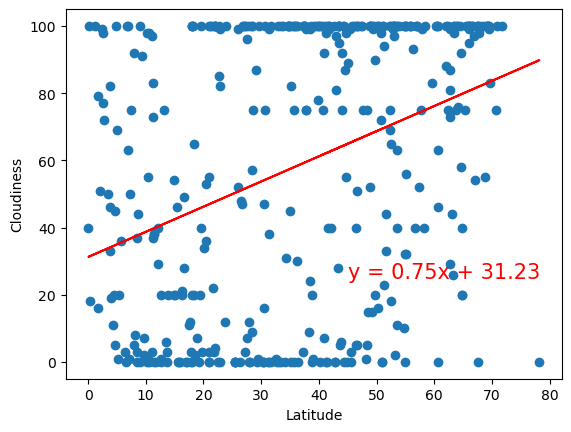

In [77]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Cloudiness"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,25),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r square value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

The r-value is: 0.28083901590047783


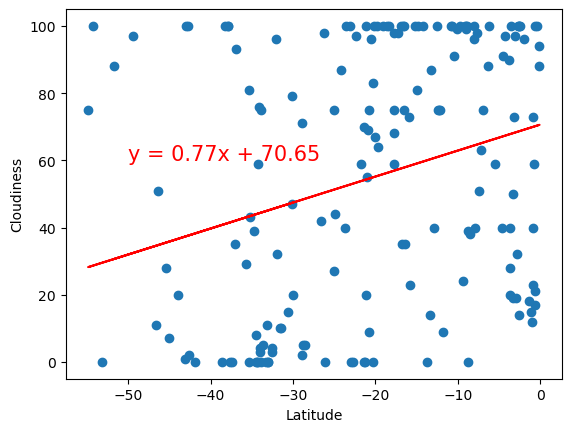

In [78]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Cloudiness"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r square value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
For both Northern Hemisphere and Southern Hemisphere, there is a positive linear relationship between Latitude and Cloudiness. This is because the r value is greater than 1. 

The extent of the relationship depends on the r value. The closer the r value to 1, the stronger the positive relationship. When r value is close to 0, which means the relationship is weak. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.14453485326717758


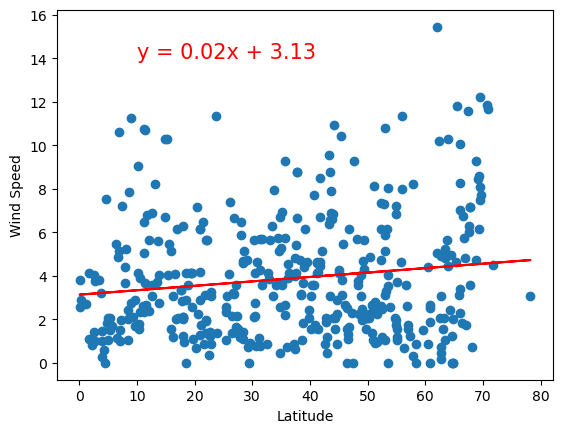

In [74]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Wind Speed"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,14),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r square value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

The r-value is: -0.323196121782241


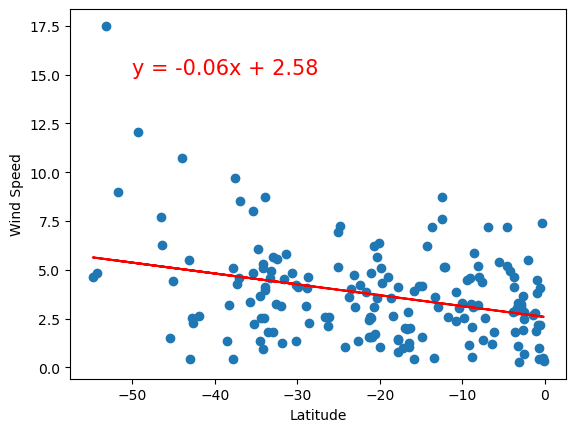

In [76]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Wind Speed"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r square value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
For Northern Hemisphere, there is a positive linear relationship between Latitude and Wind Speed. This is because the r value is greater than 1. 

For Southern Hemisphere, there is a negative linear relationship between Latitude and Wind Speed. This is because the r value is less than 1. 

The extent of the relationship depends on the r value. The closer the r value to 1, the stronger the positive relationship. The closer the r value to -1, the stronger the negative relationship. When r value is close to 0, which means the relationship is weak. 